In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix
from collections import defaultdict

with open('train.dat','r') as train_data:
    sparse_data = []
    for line in train_data:
        sparse_data.append(line)


In [103]:
ptr = [0]
ind = []
val = []

In [104]:
sparse_data[:5]

['13273 1 557 1 478 1 957 1 1230 1 53 2 55 1 91 4 1433 1 3171 1 57 2 94 2 95 1 2526 1 2843 1 99 1 4707 1 2728 1 121 1 7094 1 5078 2 402 2 4585 1 521 3 522 5 3698 1 127 1 562 1 15143 1 960 1 762 1 727 1 962 1 884 1 689 2 61 2 27 2 28 2 64 4 1082 1 3226 1 2219 1 6531 1 1609 1 1645 1 1565 1 1926 1 3664 1 6095 1 212 3 132 2 133 1 2579 1 9 2 9089 1 4797 1 416 1 417 1 13054 1 13055 1 258 1 21194 1 2020 1 697 1 1330 1 73 1 75 1 3235 3 77 1 78 1 3156 1 1735 2 1771 1 1377 1 5572 1 3277 1 3719 1 420 1 105 1 142 3 340 7 342 1 263 1 24114 1 229 3 662 1 24630 1 12291 2 17261 1 666 2 16138 1 14591 1 949 1 42 1 986 1 869 1 38670 1 62737 2 7120 1 84 1 1380 2 49 1 3163 1 1346 1 86 3 2274 1 3480 1 4534 1 3283 1 2358 10 111 8 6076 1 2595 1 511 1 1869 1 710 3 711 3 24120 1 913 6 10760 1 357 3 9949 1 393 1\n',
 '196 1 8699 4 47134 1 958 1 976 2 13459 1 3331 1 5311 1 4143 1 27957 2 10011 2 3259 2 403 1 421 1 9539 1 31144 5 962 1 369 1 289 1 40 1 13948 1 1029 1 2274 1 2572 1 1726 1 2591 2 8291 1 312 3 332 1 

In [105]:
len(sparse_data)

8580

In [106]:
temp = []
i = 0
j = 0
for doc in sparse_data:
    for d in doc.split():
        if j%2 == 0:
            ind.append(d)
        else:
            val.append(d)
        j += 1
    ptr.append(int(ptr[i] + len(doc.split())/2))
    temp.append(doc.split())
    i += 1

In [107]:
ind[:10]

['13273', '557', '478', '957', '1230', '53', '55', '91', '1433', '3171']

In [108]:
ptr[:10]

[0, 123, 159, 194, 315, 543, 674, 756, 849, 1162]

In [109]:
val[:10]

['1', '1', '1', '1', '1', '2', '1', '4', '1', '1']

In [110]:
mat = csr_matrix((val,ind,ptr), dtype=np.float32)


In [111]:
def csr_idf(matrix, copy=False, **kargs):
    r""" Scale a CSR matrix by idf. 
    Returns scaling factors as dict. If copy is True, 
    returns scaled matrix and scaling factors.
    """
    if copy is True:
        matrix = matrix.copy()
    nrows = matrix.shape[0]
    nnz = matrix.nnz
    ind, val, ptr = matrix.indices, matrix.data, matrix.indptr
    # document frequency
    df = defaultdict(int)
    for i in ind:
        df[i] += 1
    # inverse document frequency
    for k,v in df.items():
        df[k] = np.log(nrows / float(v))  ## df turns to idf - reusing memory
    # scale by idf
    for i in range(0, nnz):
        val[i] *= df[ind[i]]
        
    return df if copy is False else matrix

In [112]:
def csr_l2normalize(matrix, copy=False, **kargs):
    r""" Normalize the rows of a CSR matrix by their L-2 norm. 
    If copy is True, returns a copy of the normalized matrix.
    """
    if copy is True:
        matrix = matrix.copy()
    nrows = matrix.shape[0]
    nnz = matrix.nnz
    ind, val, ptr = matrix.indices, matrix.data, matrix.indptr
    # normalize
    for i in range(nrows):
        rsum = 0.0    
        for j in range(ptr[i], ptr[i+1]):
            rsum += val[j]**2
        if rsum == 0.0:
            continue  # do not normalize empty rows
        rsum = float(1.0/np.sqrt(rsum))
        for j in range(ptr[i], ptr[i+1]):
            val[j] *= rsum
            
    if copy is True:
        return matrix

In [113]:
mat2 = csr_idf(mat, copy=True)
mat3 = csr_l2normalize(mat2, copy=True)

In [114]:
mat3.shape

(8580, 126356)

In [115]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [116]:
# from sklearn.decomposition import TruncatedSVD

# svd = TruncatedSVD(n_components=1000, n_iter=10, random_state=42)
# reduced_mat = svd.fit_transform(mat3)

# kmeans = KMeans(n_clusters=, random_state=0).fit(reduced_mat)
# y_kmeans = kmeans.predict(reduced_mat)


In [117]:
# n_clusters_arr = [100,110,120,130,140,150]

In [118]:

# for n_cluster in n_clusters_arr:
#     kmeans = KMeans(n_clusters=n_cluster, random_state=0).fit(mat3)
#     y_kmeans = kmeans.predict(mat3)
#     print(silhouette_score(mat3, y_kmeans, metric='euclidean'))


# Silhoutte Score For K Means:
    K = 100, Score = 0.029
    K = 110, Score = 0.031
    K = 120, Score = 0.033
    K = 130, Score = 0.032
    K = 140, Score = 0.033
    K = 150, Score = 0.032
    
    

In [157]:
kmeans = KMeans(n_clusters=140, random_state=0).fit(mat3)

In [158]:
pred_kmeans = kmeans.predict(mat3)


In [159]:
pred_kmeans

array([ 70, 102,  27, ...,  58,  42,   0])

In [160]:
kmeans.cluster_centers_

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.00036872, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

In [161]:
from sklearn.metrics import silhouette_score

In [162]:
silhouette_score(mat3, pred_kmeans, metric='euclidean')


0.033846077

In [163]:
import numpy as np
import scipy

In [164]:
# plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
# plt.title('Clusters of News')
# plt.xlabel('Annual Income (k$)')
# plt.ylabel('Spending Score (1-100)')
# plt.legend()
# plt.show()

In [165]:
len(pred_kmeans)

8580

In [166]:
cluster_map = {}
for i in range(len(pred_kmeans)):
    cluster_num = pred_kmeans[i]
    if cluster_num in cluster_map :
        pointsArr = cluster_map[cluster_num]
        pointsArr.append(i)
    else:
        pointsArr = []
        pointsArr.append(i)
        cluster_map[cluster_num] = pointsArr

In [167]:
# print(cluster_map)
sorted(cluster_map.keys())

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139]

In [168]:
cluster_map[0]

[47,
 110,
 305,
 364,
 420,
 557,
 605,
 610,
 673,
 765,
 767,
 780,
 872,
 896,
 1016,
 1132,
 1207,
 1338,
 1660,
 1678,
 1771,
 1786,
 1797,
 1946,
 2176,
 2344,
 2702,
 2883,
 2911,
 3000,
 3015,
 3025,
 3154,
 3209,
 3352,
 3353,
 3455,
 3574,
 3846,
 3969,
 4004,
 4024,
 4136,
 4356,
 4474,
 4599,
 4816,
 4847,
 4932,
 5011,
 5019,
 5081,
 5097,
 5459,
 5535,
 5586,
 5630,
 5702,
 5800,
 5888,
 5897,
 6001,
 6128,
 6256,
 6420,
 6454,
 6489,
 6513,
 6566,
 6569,
 6588,
 6608,
 6709,
 6711,
 6760,
 6807,
 6945,
 6978,
 7110,
 7230,
 7233,
 7270,
 7295,
 7539,
 7711,
 7816,
 7887,
 7928,
 7948,
 7970,
 8315,
 8380,
 8466,
 8579]

In [169]:
def val_copy(tgt,src):
    for i in src:
        tgt.append(i)

In [170]:
cluster_matrix = {}

for cluster_num in cluster_map:
    cluster_ptr=[]
    cluster_ind=[]
    cluster_val=[]
    cluster_ptr.append(0)
    index = 0
    cluster_pts = cluster_map[cluster_num]
    for i in cluster_pts:
        index = index + 1
        val_copy(cluster_val, val[ptr[i]:ptr[i+1]])
        val_copy(cluster_ind, ind[ptr[i]:ptr[i+1]])
        features_num = ptr[i+1] -  ptr[i]
        new_val  = cluster_ptr[index-1]+features_num
        cluster_ptr.append(new_val)
    nrows = len(cluster_pts)
    ncols = mat3.shape[1]
    clstr_mat = csr_matrix((cluster_val, cluster_ind, cluster_ptr), shape=(nrows, ncols), dtype=np.float32)
    cluster_matrix[cluster_num] = clstr_mat

In [171]:
cent = []
for i in range(len(cluster_matrix)):
    a = cluster_matrix[i]
    nrows = cluster_matrix[i].shape[0]
    ncols = cluster_matrix[i].shape[1]
    sum1 = 0.0
    
    sum1 = a.sum(axis=1)
    sum2 = sum1.sum(axis=0)
    print(sum1)
    norm = sum2 / (nrows)
    cent.append(norm)
    

[[145.]
 [ 94.]
 [ 84.]
 [ 96.]
 [236.]
 [131.]
 [374.]
 [360.]
 [372.]
 [406.]
 [278.]
 [129.]
 [186.]
 [151.]
 [110.]
 [ 71.]
 [144.]
 [285.]
 [251.]
 [146.]
 [226.]
 [332.]
 [287.]
 [512.]
 [138.]
 [259.]
 [353.]
 [249.]
 [258.]
 [173.]
 [ 63.]
 [264.]
 [ 71.]
 [264.]
 [137.]
 [279.]
 [117.]
 [260.]
 [302.]
 [271.]
 [299.]
 [202.]
 [122.]
 [313.]
 [123.]
 [ 89.]
 [276.]
 [227.]
 [136.]
 [244.]
 [192.]
 [118.]
 [415.]
 [ 68.]
 [120.]
 [473.]
 [289.]
 [233.]
 [411.]
 [361.]
 [ 99.]
 [253.]
 [229.]
 [313.]
 [327.]
 [225.]
 [348.]
 [366.]
 [117.]
 [306.]
 [292.]
 [379.]
 [252.]
 [308.]
 [340.]
 [295.]
 [189.]
 [187.]
 [197.]
 [141.]
 [157.]
 [420.]
 [211.]
 [ 35.]
 [140.]
 [ 63.]
 [316.]
 [284.]
 [127.]
 [321.]
 [354.]
 [316.]
 [121.]
 [198.]]
[[ 437.]
 [ 117.]
 [ 310.]
 [ 295.]
 [ 155.]
 [ 123.]
 [ 169.]
 [  58.]
 [ 196.]
 [ 170.]
 [  38.]
 [ 286.]
 [  33.]
 [ 121.]
 [  52.]
 [ 199.]
 [ 327.]
 [ 145.]
 [ 546.]
 [  54.]
 [ 117.]
 [ 128.]
 [ 434.]
 [ 142.]
 [  87.]
 [ 122.]
 [ 120.]
 [  

In [172]:
print(len(cent))

140


In [173]:
from sklearn.metrics import pairwise_distances
import networkx as nx

def average_distance(matrix, cluster1_mod, cluster2_mod):
    sum = np.sum(matrix)
    mul = cluster1_mod * cluster2_mod
    dist = sum / mul
    return dist

In [174]:
def get_Num_pts(matrix):
    return matrix.shape[0]


In [175]:
# epsilon = 20
# minpts = 4

def find_neighbourhoods(cluster_matrix,epsilon,minpts):
    core_clusters = []
    neighborhoods = []
    for i in range (len(cluster_matrix)):
        neighbors = []
        neighbors.append(i)
        for j in range (len(cluster_matrix)):
            if i != j :
                dist_matrix = pairwise_distances(cluster_matrix[i], cluster_matrix[j], metric='euclidean',n_jobs=-1)
                cluster1_mod = get_Num_pts(cluster_matrix[i])
                cluster2_mod = get_Num_pts(cluster_matrix[j])
                dist = average_distance(dist_matrix,cluster1_mod,cluster2_mod)
                if dist <= epsilon :
                    neighbors.append(j)
        neighborhoods.append(neighbors)
    
        if len(neighbors) > minpts :
            core_clusters.append(i)
    print("core clusters..",core_clusters)
    return core_clusters , neighborhoods

    

In [176]:
# print(neighborhoods)

# Find Border Cluster

In [177]:

def get_border_cluster(cluster_matrix,core_clusters,neighborhoods, minpts):
    border_clusters = []
    for i in range(len(cluster_matrix)):
        neighbors = neighborhoods[i]
        if len(neighbors) <= minpts:
            for j in range(len(neighbors)):
                if neighbors[j] in core_clusters:
                    border_clusters.append(i)
                    break
            print("border clusters: ", border_clusters)
    return border_clusters



# Find noise clusters


In [178]:
def get_noise_cluster(cluster_matrix,core_clusters,border_clusters):
    noise_clusters = []
    for i in range(len(cluster_matrix)):
        if i not in core_clusters and i not in border_clusters:
            noise_clusters.append(i)
        print("noise", noise_clusters)
    return noise_clusters
   

In [179]:
# Invoke graph instance to visualize the cluster
# G = nx.Graph()
# Add nodes -- core points + border points
# nodes = core_clusters+border_clusters+noise_clusters
# G.add_nodes_from(nodes)

In [190]:
# Create neighborhood

def create_neighbourhood(nodes,cluster_matrix,epsilon, G):
    for i in range(len(nodes)):
        for j in range(len(nodes)):
        # If the distance is below the threshold, add a link in the graph.
            if j != i:
                dist_matrix = pairwise_distances(cluster_matrix[i], cluster_matrix[j], metric='euclidean')
                #points_num = getNumOfPoints(dist_matrix)
                cluster1_mod = get_Num_pts(cluster_matrix[i])
                cluster2_mod = get_Num_pts(cluster_matrix[j])
                dist = average_distance(dist_matrix,cluster1_mod,cluster2_mod)
                if dist <= epsilon :
                    G.add_edges_from([(nodes[i], nodes[j])])
    return G 

# Calculating Silhoutee Score for different min values 

In [191]:
# G = nx.Graph()
# min_pts = [3,5,7,9,11,13,15,17,19]
# eps = 16
# silhoute_score = [] 
# for pt in min_pts:
#     core_clusters , neighborhoods = find_neighbourhoods(cent, eps, pt)
#     border_clusters = get_border_cluster(cluster_matrix, core_clusters, neighborhoods, pt)
#     noise_clusters  =  get_noise_cluster(cluster_matrix, core_clusters,border_clusters )
#     nodes = core_clusters+border_clusters+noise_clusters
#     G.add_nodes_from(nodes)
#     G = create_neighbourhood(nodes,cluster_matrix,eps,G)
#     clusterslist = list(nx.connected_components(G))
#     clusterslist.append(set(noise_clusters))
    
#     pointsWithClustersMap = {}
#     for i in range(1,len(clusterslist)+1):
#         clusters = clusterslist[i-1]
#         for clusternum in clusters:
#             pointslist = cluster_map[clusternum]
#             for pointnum in pointslist:
#                 pointsWithClustersMap[pointnum] = i
#     print(pointsWithClustersMap)
#     cluster_labels =[]
#     for clMp in range(len(pointsWithClustersMap)):
#         cluster_labels.append(pointsWithClustersMap[clMp])
#     silhouette_avg = silhouette_score(mat3, cluster_labels, metric='euclidean')
#     print("Silhoutte for min pts " + str(pt) + "is" + str(silhouette_avg))
#     silhoute_score.append(silhouette_avg)
    
    

In [192]:
# print(silhoute_score)

In [193]:
# import matplotlib.pyplot as plt



In [194]:
# plt.scatter(min_pts, silhoute_score)

In [198]:
G = nx.Graph()
min_pts = 4
eps = 16
silhoute_score = [] 
core_clusters , neighborhoods = find_neighbourhoods(cent, eps, min_pts)
border_clusters = get_border_cluster(cluster_matrix, core_clusters, neighborhoods, min_pts)
noise_clusters  =  get_noise_cluster(cluster_matrix, core_clusters,border_clusters )
nodes = core_clusters+border_clusters
G.add_nodes_from(nodes)
G = create_neighbourhood(nodes,cluster_matrix,eps,G)
clusterslist = list(nx.connected_components(G))
clusterslist.append(set(noise_clusters))
    
pointsWithClustersMap = {}
for i in range(1,len(clusterslist)+1):
    clusters = clusterslist[i-1]
    for clusternum in clusters:
        pointslist = cluster_map[clusternum]
        for pointnum in pointslist:
            pointsWithClustersMap[pointnum] = i
print(pointsWithClustersMap)

core clusters.. [0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 38, 39, 40, 42, 43, 45, 46, 47, 48, 49, 50, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 85, 86, 87, 88, 89, 90, 92, 94, 95, 96, 97, 99, 100, 101, 102, 103, 104, 105, 107, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139]
border clusters:  []
border clusters:  [12]
border clusters:  [12]
border clusters:  [12]
border clusters:  [12]
border clusters:  [12]
border clusters:  [12]
border clusters:  [12]
border clusters:  [12]
border clusters:  [12]
border clusters:  [12, 93]
border clusters:  [12, 93]
border clusters:  [12, 93]
border clusters:  [12, 93]
border clusters:  [12, 93, 125]
border clusters:  [12, 93, 125, 126]
noise []
noise []
noise [2]
noise [2]
noise [2]
noise [

In [199]:
op_file = open("ext.dat", "w")
cluster_labels =[]
for i in range(len(pointsWithClustersMap)):
    op_file.write(str(pointsWithClustersMap[i]) +'\n')
    cluster_labels.append(pointsWithClustersMap[i])
op_file.close()

In [200]:
silhouette_avg = silhouette_score(mat3, cluster_labels, metric='euclidean')
print("n_clusters =", len(clusterslist),"silhouette_score is :", silhouette_avg)

n_clusters = 113 silhouette_score is : 0.02190152


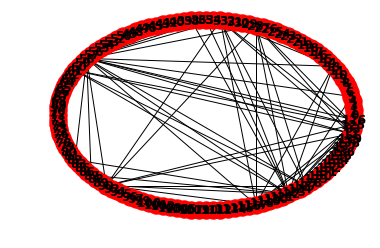

In [201]:
plt.subplot(111)
nx.draw_circular(G, with_labels=True, font_weight='bold')
plt.show()

In [202]:
# # List the connected components / clusters
# clusterslist = list(nx.connected_components(G))
# print("#num  clusters:", len(clusterslist))
# print("clusterslist: ", clusterslist)


In [151]:
# #all noise points under last cluster+1
# #noise_cluster_num = len(clusterslist)+1
# clusterslist.append(set(noise_clusters))
# print("#num  clusters:", len(clusterslist))
# print("clusterslist: ", clusterslist)

In [152]:
# pointsWithClustersMap = {}
# for i in range(1,len(clusterslist)+1):
#     clusters = clusterslist[i-1]
#     for clusternum in clusters:
#         pointslist = cluster_map[clusternum]
#         for pointnum in pointslist:
#             pointsWithClustersMap[pointnum] = i
# print(pointsWithClustersMap)

In [153]:
# plt.subplot(111)
# nx.draw_circular(G, with_labels=True, font_weight='bold')
# plt.show()

In [154]:
# silhouette_score(X, labels, metric='euclidean')

In [155]:
# op_file = open("cls.dat", "w")
# cluster_labels =[]
# for i in range(len(pointsWithClustersMap)):
#     op_file.write(str(pointsWithClustersMap[i]) +'\n')
#     cluster_labels.append(pointsWithClustersMap[i])
# op_file.close()

In [156]:
# silhouette_avg = silhouette_score(mat3, cluster_labels, metric='euclidean')
# print("For n_clusters =", len(clusterslist),"The average silhouette_score is :", silhouette_avg)